<h1>Abstract</h1> 

Monte Carlo methods employ random sampling to get numerical results. Here, I discuss the application of Monte Carlo to numerical integration and numerical solution of ODEs using simple examples. The convergence of the numerical results are just dependent on the sample size, which is suited better for integrals of mulivalued functions and partial differential equations.

In [2]:
import numpy as np
from random import uniform 
import matplotlib.pyplot as plt
%matplotlib inline

<h1>I. Numerical Integration</h1>

To get the average of a function, $<f(x)>$ over an interval $[a,b]$, we integrate $f(x)P(x)$ over $[a,b]$,<br/> where P(x) is the probability distribution function, $P(x) = \frac{1}{b-a}$:

$<f(x)> = \frac{1}{b-a}\int_{a}^{b}f(x)dx.$

So we can define the integral of $f(x)$ over the interval $[a,b]$ in terms of it's average $<f(x)>$:

$\int_{a}^{b}f(x)dx = (b-a)<f(x)>.$

In evaluating the average $<f(x)>$ over the interval $[a,b]$, we can use random sampling to approximate it:

$<f(x)> \sim \frac{1}{K}\sum_{i=1}^{K}f(x_{i})$, where $x_{i}$ is a randomly chosen number within the interval $[a,b]$ and $K$ is the number of samples. <br/><br/>
Basically, we randomly choose $K$ numbers within the interval $[a,b]$ and evulate the function with those numbers,<br/> then take the average to approximate the average of $f(x)$ over the interval $[a,b]$ to approximate the integral:

$\int_{a}^{b}f(x)dx \sim (b-a)\frac{1}{K}\sum_{i=1}^{K}f(x_{i})$

To get a better approximation of the 
integral, we can divide the interval $[a,b]$ into subintervals (smaller intervals) and consider more samples. <br/>
Thus, the convergence is just a matter of sample size which makes Monte Carlo more useful for integrals 
of multivalued functions and partial differential equations. As an example, we numerically solve for 
$\int_{0}^{\pi}x^{2}\cos(x)dx$. (The answer is $-2\pi$)



In [91]:
a = 0
b = np.pi
n = 100 #number of subintervals of the interval [a,b]
N = 100 #number of samples 
x = np.zeros(n+1) #list of x values
h = (b-a)/n #step size

f = lambda x: (x**2)*np.cos(x) #integrand

total = 0
for i in range(n):
    x[i+1] = x[i] + h
    f_mean = 0 #initialization
    for k in range(N): 
        x_k = uniform(x[i],x[i+1]) #random number within the subinterval
        f_mean = f(x_k) + f_mean 
    sub_area = (h/N)*f_mean #average for the subinterval
    total = sub_area + total #average for the interval
print(total)    

-6.2846812433372845


If we compute for the approximate integral 500 times, the average would tend to the real value, $-2\pi$  

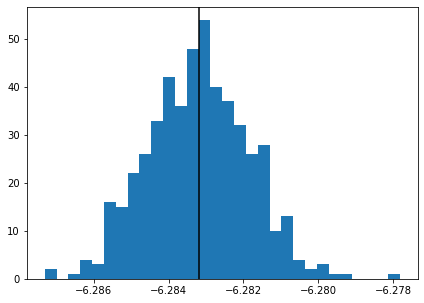

In [92]:
K = 500
intrl = np.zeros(K)
for j in range(len(intrl)):    
    total = 0
    for i in range(n):
        x[i+1] = x[i] + h
        f_mean = 0 #initialization
        for k in range(N):
            x_k = uniform(x[i],x[i+1]) #random number within the subinterval
            f_mean = f(x_k) + f_mean 
        sub_area = (h/N)*f_mean
        total = sub_area + total
    intrl[j] = total
plt.figure(figsize = (7,5))
plt.hist(intrl, bins = 30)
plt.axvline(x=-2*np.pi,color = 'black')

<h1>II Numerical ODE</h1> 

The solution of 

$\frac{dy}{dx} = f(x)$

is just

$y_{i+1} = y_{i} + \int_{x_{i}}^{x_{i+1}}f(x)dx$, where $y_{i} = f(x_{i})$ and $y_{i+1} = f(x_{i+1})$ 

The integral can be approximated using random sampling as shown in the previous section:

$y_{i+1} \sim y_{i} + \frac{x_{i+1}-x_{i}}{K}\sum_{i=1}^{K}f(x_{k})$, where $x_{k}$ is randomly chosen between $x_{i}$ and $x_{i+1}.$

As an example, we consider the initial value problem:

$\frac{dy}{dx} = e^{x}$, $y_{0} = y(0)$ 

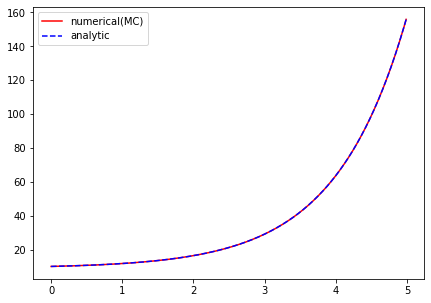

In [9]:
K = 100 #number of samples  
n = 500 #number of points
h = 0.01 #step size
y = np.zeros(n) 
x = np.zeros(n)
x_0 = 0 
y_0 = 10

f = np.exp  #f(x): dy/dx = f(x)
f_a = lambda x: y_0 + np.exp(x) -1 #analytic solution of the ODE

x[0] = x_0
y[0] = y_0

for i in range(n-1):
    x[i+1] = x[i] + h
    f_mean = 0
    for k in range(K):
        x_k = uniform(x[i],x[i+1])
        f_mean = f(x_k) + f_mean
    y[i+1] = y[i] + (h/K)*f_mean
    
plt.figure(figsize = (7,5))
plt.plot(x,y,color = 'red', label = 'numerical(MC)')    
plt.plot(x,f_a(x),linestyle = 'dashed',color = 'blue', label = 'analytic')
plt.legend(loc = 'best')